Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE`, as well as your name below:

In [1]:
NAME = "Tarandeep"

---

### This notebook has been provided to you by LiveAI.eu of Assen, 9406 RX, The Netherlands
Please read the terms and conditions below.
For details please visit https://liveai.eu/utdallas-beta/privacy-and-terms/ or contact us at contact@liveai.eu

#### All rights reserved.

**All Intellectual Property Rights in the Course Materials, Online Courses and the speeches made by trainers at the Taught Courses are, and remain, the intellectual property of liveai.eu or its licensors, whether adapted, written for or customised for the Client or not.**

You are not authorised to:-

- copy, modify, reproduce, re-publish, sub-licence, sell, upload, broadcast, post, transmit or distribute any of the Course Materials without prior written permission;
- record on video or audio tape, relay by videophone or other means the Online Course or Taught Course given
- use the Course Materials in the provision of any other course or training whether given by us or any third party trainer;
- remove any copyright or other notice of liveai.eu on the Course Materials;
- modify, adapt, merge, translate, disassemble, decompile, reverse engineer (save to the extent permitted by law) any software forming part of the Online Courses.

Breach any of the above clauses by you shall allow us to immediately terminate these terms and conditions with you and cease to provide you with any Services, including but not limited to access to the Online Courses.
#### In consideration of the Fees paid by you, we grant to you a limited, non-transferable, non-exclusive licence to use the Course Materials and the software in respect of the Online Course for the sole purpose of completing the Online Course and / or attending the Taught Course.Intellectual Property

You are given two 'csv' file that consists of 1. Raman spectroscopy data ('spectrum_baseline.csv') and 2. label ('label.csv'), a Liver Cancer Dataset. Your job is to:
- Classify this data into:
    - Binary class (Normal vs Disease)
    - Multi Class (Normal vs Disease Type 2 vs Disease Type 3).
- Perform feature importance analysis with PCA reduction based on spectrum data.

You'll be given some incomplete functions which you will need to complete by writing code. Each graded function carrys some marks. To complete this graded function you've to write your code between `# YOUR CODE HERE` and `raise NotImplementedError()`

- ORIGINAL DATA SOURCE:

  - The dataset contains 1014 features and 960 examples
    - **Note: This is a binary Classification problem as well as Multi Class Classification problem along with PCA Reduction**

  - This Dataset is taken for Hospitals for academic research and for privacy issues the official website cannot be disclosed here.

### Early Detection of Liver Cancer
- Liver cancer is second most predominant cancer and hence early detection can save many lives
<img src="https://github.com/tannisthamaiti/Liver_cancer_classification/blob/master/img/LC1.PNG?raw=true" height=500px>
<center> <b> Fig 1: Liver Cancer survival rate by stage of cancer </b> </center>
- Surface-enhanced Raman spectroscopy (SERS) for blood plasma analysis is used for non-invasive liver cancer detection. The effect of different laser polarizations (non-polarized, linearpolarized, right-handed circularly polarized, and left-handed circularly polarized) on blood plasma is explored here. Blood plasma samples from liver cancer patients (n = 654) and healthy subjects (n = 306) were analyzed.

- Raman spectroscopy provides fingerprinting type information on the structure and conformation of macromolecules such as proteins, nucleic acids, and lipids.

#### Raman Spectrum
- The SERS spectra were measured with a fiber optic Raman system in the range of 300–1800 cm$^{−1}$. The Raman system comprised a 785nm excitation laser
- In order to excite the sample with differently polarized laser light, different polarizer are added into the Raman probe. The probe consisted of two arms, as shown in Figure.  The illumination arm on the left side incorporated a collimator, a band pass (BP) filter, a polarizer, and a focusing lens to deliver the laser light of desired polarization onto the sample. A right-handed circular polarizer and left-handed circular polarizer are used to obtain left-handed and righthanded circularly polarized light, respectively.
- Linear polarized light was obtained by flipping a circular polarizer and let light passing through it in the opposite direction. Non-polarized light was obtained by removal of the polarizer from the illumination arm. The SERS spectra were acquired with a 20 s integration time.
<img src="https://github.com/tannisthamaiti/Liver_cancer_classification/blob/master/img/LD2.jpg?raw=true" height=500px>
<center> <b> Fig 2: A raman spectrometer set up in Laboratory </b> </center>
<img src="https://github.com/tannisthamaiti/Liver_cancer_classification/blob/master/img/LD3.jpg?raw=true" height=300px>
<center> <b> Fig 3: A laser excites a nanoparticle to emit a characteristic spectrum </b> </center>

#### Pre-processing
- Baseline drift always negatively affects the qualitative or quantitative analytical results of Raman spectroscopy and hence needs to be corrected. The parameters of these methods, however, are usually set through a complex and time-consuming process.
- A Savitzky–Golay filter is usually appled to Raman spectroscopy for the purpose of smoothing the data, that is, to increase the precision of the data without distorting the signal tendency. This is achieved, in a process known as convolution, by fitting successive sub-sets of adjacent data points with a low-degree polynomial by the method of [Linear least square](https://en.wikipedia.org/wiki/Linear_least_squares#:~:text=%20The%20three%20main%20linear%20least%20squares%20formulations,efficient%20estimation%20of%20%CE%B2%20when%20either...%20More%20)
.
<img src="https://github.com/tannisthamaiti/Liver_cancer_classification/blob/master/img/Filtered_Spectrum.png?raw=true" height=500px>
<center> <b> Fig 4: Applying a Savitzky–Golay filter to smooth the data </b> </center>

# Importing Relevant Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/AAIE_cohort1/week2/Liver_Cancer_Classification_graded_assignment_week2')

In [5]:
!ls

binary_roc.png	       LD3.jpg
features.png	       LiveAI_Week2_Liver_Cancer_Classification.ipynb
Filtered_Spectrum.png  LiveAI_Week2_Liver_Cancer_Classification_Taran.ipynb
labels.csv	       multiclass_roc.png
LC1.PNG		       raman.png
LD2.jpg		       spectrum_baseline.csv


In [6]:
import numpy as np #library used for working with arrays
import pandas as pd #used for data manipulation and analysis
import matplotlib.pyplot as plt #used for plotting 2D graphics
from sklearn import metrics #used for evaluating the classifier

# Data Analysis
- Data Analysis gives you a better understanding of the data hence enabling you to take better decisions
- In this section we will read the data, show few rows of data and analyse the examples per class available in the data
- Exploratory Data Analysis is an important first step in building any model.

In [7]:
spectrum_path = 'spectrum_baseline.csv'# load the provided spectrum_baseline.csv from the drive'
labels_path = 'labels.csv'# load the provided labels.csv from the drive'

In [8]:
#GRADED ASSIGNMENT
#Point = 1
#function to read data into pandas data frame
def read_data(spectrum_path, labels_path):
    """This function reads csv file into pandas dataframe
    spectrum_path: path to spectrum csv file
    labels_path: path to labels csv file

    Returns: two Dataframe of data_spectrum and labels separately

    Hint: use read_csv method of pandas"""
    # YOUR CODE HERE
    data_spectrum = pd.read_csv(spectrum_path)
    labels = pd.read_csv(labels_path)

    return data_spectrum, labels

In [9]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [10]:
data_spectrum, labels = read_data(spectrum_path, labels_path)

In [11]:
print(data_spectrum.shape)
print(labels.shape)

(960, 1014)
(960, 1)


In [12]:
#GRADED ASSIGNMENT
#Point = 1
#function to show first few  rows of data
def show_data(dataframe, nrows):
    """This function shows n-rows of data
    dataframe: data to be displayed
    nrows: number of rows to be displayed

    Returns: dataframe with first n-rows

    Hint: use head method of dataframe object"""
    # YOUR CODE HERE
    return dataframe.head(nrows)

In [13]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [14]:
show_data(data_spectrum, 10)

,0,1,2,3,4,5,6,7,8,9,...,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013
0,-0.007168,-0.007309,-0.007894,-0.009699,-0.013334,-0.013891,-0.017551,-0.013952,-0.015063,-0.017254,...,-0.010983,-0.011324,-0.010577,-0.014954,-0.012809,-0.008936,-0.012068,-0.007975,-0.012944,-0.018022
1,-0.026160,-0.028556,-0.034278,-0.031825,-0.032386,-0.035147,-0.036598,-0.038180,-0.037825,-0.038753,...,-0.003454,-0.003327,-0.000559,0.000154,-0.002800,0.004720,0.000385,0.005074,0.004801,0.004822
2,-0.031581,-0.035307,-0.038718,-0.039531,-0.040907,-0.042941,-0.042346,-0.043566,-0.041441,-0.042693,...,-0.002052,-0.003638,0.005746,0.001255,0.003299,0.009547,0.009662,0.008102,0.003966,0.007633
3,-0.031581,-0.035307,-0.038718,-0.039531,-0.040907,-0.042941,-0.042346,-0.043566,-0.041441,-0.042693,...,-0.002052,-0.003638,0.005746,0.001255,0.003299,0.009547,0.009662,0.008102,0.003966,0.007633
4,-0.002102,-0.010647,-0.008272,-0.013363,-0.006564,-0.012530,-0.010210,-0.015917,-0.011182,-0.009740,...,0.041063,0.040947,0.050633,0.039728,0.037307,0.044642,0.035721,0.044534,0.035165,0.040932
5,-0.018647,-0.022914,-0.021117,-0.023763,-0.023108,-0.025394,-0.029898,-0.033561,-0.033147,-0.035251,...,0.024325,0.033887,0.028898,0.025975,0.034043,0.038652,0.033379,0.035205,0.031949,0.035309
6,-0.009548,-0.013291,-0.011994,-0.015611,-0.015684,-0.020481,-0.023724,-0.024418,-0.024802,-0.026615,...,0.026889,0.026335,0.022100,0.013440,0.023034,0.027155,0.019992,0.023317,0.028131,0.006718
7,-0.010537,-0.017030,-0.017334,-0.020554,-0.027638,-0.034006,-0.034369,-0.035742,-0.030281,-0.033438,...,0.012967,0.019499,0.022267,0.024083,0.020523,0.023527,0.025674,0.034380,0.030583,0.026408
8,-0.007351,-0.002823,-0.012510,-0.010024,-0.016558,-0.018151,-0.019924,-0.020766,-0.016673,-0.023809,...,0.031582,0.034024,0.035807,0.033552,0.026976,0.030276,0.026622,0.027804,0.023666,0.018359
9,0.009203,0.008133,0.005689,0.000873,0.003301,0.002201,-0.000365,-0.000685,0.000025,-0.001573,...,0.042001,0.037490,0.045096,0.041411,0.030488,0.038015,0.036330,0.031104,0.022863,0.022904


In [15]:
show_data(labels, 10)

,labels
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
#GRADED ASSIGNMENT
#Point = 1
#Function to inspect counts of unique values
def samples_per_class(data):
    """This function return a Series containing counts of unique values.
    data: pandas series object that you've to inspect

    Returns: counts of unique values

    Hint: use value_counts method of series object"""
    # YOUR CODE HERE
    return data.value_counts()

In [17]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [18]:
samples_per_class(labels.labels)

,count
labels,
0,306
2,263
4,196
3,195


# Student's t-test

**What is a t-score ?**
- The t-score is the ratio between the difference between two groups and the difference whithin the groups. A large t-score tells you that the groups are different. A small t-score tells you that the groups are similar. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.


**What are T-Values and P-values ?**
- Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. For example, a p-value of .05 means there is only a 5% probability that the results from an experiment happened by chance.

**Type of t-tests ?**
- There are three main types of t-test:
    - An Independent Samples t-test compares the means for two groups.
    - A Paired sample t-test compares means from the same group at different times.
    - A One sample t-test tests the mean of a single group against a known mean.

**Compare the critical t-values with the calculated t statistic**
- If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations. Therefore, you reject the null hypothesis that there is no statistically significant difference between the two populations.
- In the t-test comparing the means of two independent samples, the following assumption should be met:
    - Mean of the two populations being compared should follow a normal distribution.

**PCA and student t-test Analysis**
    
- Find if the mean of the two distributions are different and statistically significant

In this section we will analyse independent-sample t-test to features of diseased and normal spectrum. We need to verify is the features in normal and diseased samples are significantly different. A large t-value indicates that the groups are different and if (p < 0.05) then there is also significant difference between two groups. This test will also verify that we can fit a ML algorithm and we can separate diseased and normal samples with ease and they don't have any correlation between them.

The below figures explains the difference between two spectrums: diseased and healthy. As you can see there is significant difference peaks in spectrum for a particular Raman shift. For diseased samples there is translation in peak values corresponding to a particular Raman Shift. Also there is modification of spectrum for a diseased sample in comparison to Normal sample. It is important to note that each spectrum consists of spectrum value at each Raman shifts (cm$^{-1}$).
<img src="https://github.com/tannisthamaiti/Liver_cancer_classification/blob/master/img/raman.png?raw=true" height=500px>

In [19]:
#GRADED ASSIGNMENT
#Point = 2
#Function to extract a particular feature for a particular disease type
def get_particular_features_for_particular_disease(data_spectrum, labels, disease_type, feature):
    """This function extract a particular feature for a particular disease type
    data_spectrum: spectrum dataframe
    labels: labels dataframe
    disease_type: which disease type to be extracted {0:Normal, 2,3,4:Disease}
    feature: int, which feture to be extracted

    Returns: filtered data

    Hint: use where method of dataframe. remember feature name of labels dataframe is basically column which is string"""
    # Use the correct column name for filtering
    filtered_indices = labels[labels['labels'] == disease_type].index

    # Extract the specified feature for the filtered indices from the data_spectrum DataFrame
    filtered_data = data_spectrum.loc[filtered_indices, str(feature)]

    return filtered_data

In [20]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [21]:
spectrum_normal_feature_a = get_particular_features_for_particular_disease(data_spectrum, labels, 0, 0) #extracting 1st feature from normal sample
spectrum_normal_feature_b = get_particular_features_for_particular_disease(data_spectrum, labels, 0, 100) # extracting 100th feature

spectrum_disease_feature_a = get_particular_features_for_particular_disease(data_spectrum, labels, 2, 0) #extracting 1st feature from diseased sample
spectrum_disease_feature_b = get_particular_features_for_particular_disease(data_spectrum, labels, 2, 100) #extracting 100th feature from diseased sample

In [22]:
print(spectrum_normal_feature_a.shape)
print(spectrum_normal_feature_b.shape)
print(spectrum_disease_feature_a.shape)
print(spectrum_disease_feature_b.shape)

(306,)
(306,)
(263,)
(263,)


\begin{equation*}
S^{2} = \frac{\sum \left ( x - M \right )^{2}}{n - 1}
\end{equation*}

\begin{equation*}
t = \frac{M_{x} - M_{y}}{\sqrt{\frac{S_{x}^{2}}{n_{x}}+\frac{S_{y}^{2}}{n_{y}}}}
\end{equation*}

\begin{equation*}
df = n_{x} + n_{y} - 2
\end{equation*}

- $M_{x}$ = mean of sample x  #feature a in spectrum
- $M_{y}$ = mean of sample y #feature b in spectrum
- $S_{x}$ = std deviation in sample x
- $S_{y}$ = std deviation in sample y
- $N_{x}$ = sample space of x
- $N_{y}$ = sample space of y
- $df$ = degree of freedom based on the sample sizes.

In [23]:
#GRADED ASSIGNMENT
#Point = 2
#function to compute standard deviation according to above formula
def standard_deviation(x):
    """This function computes standard deviation according to above formula
    x: data for which standard deviation is to be calculated

    Returns: standard deviation

    Note: do not use any built-in function, instead implement the fomula given above"""

    # YOUR CODE HERE
     # Calculate the mean
    mean_x = sum(x) / len(x)

    # Calculate the sum of squared differences from the mean
    squared_diff_sum = sum((xi - mean_x) ** 2 for xi in x)

    # Calculate the variance
    variance = squared_diff_sum / (len(x) - 1)

    # Calculate the standard deviation
    std_dev = math.sqrt(variance)

    return std_dev


In [24]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [25]:
def t_test(x1, x2):
    """This function performs t-test according to the formula given above
    x1 and x2: two data on which t-test is to be perfomred

    Returns: t-value

    Hint: use standard_deviation which you implemented earlier. look at the formula given above"""

    # YOUR CODE HERE
    # Calculate the means of the two samples
    mean_x1 = sum(x1) / len(x1)
    mean_x2 = sum(x2) / len(x2)

    # Calculate the standard deviations of the two samples
    std_dev_x1 = standard_deviation(x1)
    std_dev_x2 = standard_deviation(x2)

    # Calculate the sample sizes
    n_x1 = len(x1)
    n_x2 = len(x2)

    # Calculate the t-value using the formula
    t_value = (mean_x1 - mean_x2) / ((std_dev_x1 ** 2 / n_x1) + (std_dev_x2 ** 2 / n_x2)) ** 0.5

    return t_value
    raise NotImplementedError()

In [26]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [27]:
#GRADED ASSIGNMENT
#Point = 2
#function to compute degree of freedom
def degree_freedom(x1, x2):
    """This function computes degree of freedom according to formula given above
    x1 and x2: two data for which degree of freedom is to be found

    Returns: degree of freedom

    Hint: see the formula given above"""

    # YOUR CODE HERE
    # YOUR CODE HERE
    # Calculate the sample sizes
    n_x1 = len(x1)
    n_x2 = len(x2)

    # Compute the degree of freedom
    df = n_x1 + n_x2 - 2
    return df

In [28]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [29]:
from scipy import stats
import math

In [30]:
t = t_test(spectrum_disease_feature_a, spectrum_normal_feature_a)

In [31]:
print(t)

11.810031772673826


In [32]:
df = degree_freedom(spectrum_disease_feature_a, spectrum_normal_feature_a)
t = t_test(spectrum_disease_feature_a, spectrum_normal_feature_a)
if t>0:
    p = 1 - stats.t.cdf(t,df=df, loc = 1)
else:
    p = stats.t.cdf(t,df=df, loc = 1)
print('t-value is {} and p-value is {} for 1st feature of the spectrum'.format(t, p))

t-value is 11.810031772673826 and p-value is 0.0 for 1st feature of the spectrum


In [33]:
df = degree_freedom(spectrum_disease_feature_b, spectrum_normal_feature_b)
t = t_test(spectrum_disease_feature_b, spectrum_normal_feature_b)
if t>0:
    p = 1 - stats.t.cdf(t,df=df, loc = 1)
else:
    p = stats.t.cdf(t,df=df, loc = 1)
print('t-value is {} and p-value is {} for 2nd feature of the spectrum'.format(t, p))

t-value is -2.7787075968864925 and p-value is 8.716163124315017e-05 for 2nd feature of the spectrum


**Note: Negative t-value just implies that there is an inverse relationship. If you interchange x1 with x2 in t_test function you will see the reversal of sign**

Every machine learning projects involves some well defined path, although not necessarily but generally this is observed if broadly seen
- Getting the data
- Preprocessing
- Standarize the data (Depending upon the Algorithm you're using)
- Splitting the data
- Training the model
- Prediction and model evaluation

Each of the above broadly classified steps involved many sub steps which is problem and data dependent

# 1. Binary Classification using Naive Bayes

- Here in this section we will work on binary classification problem. So for that we first have to convert our data to binary data having labels 0/1.

### Preprocessing

In [34]:
#create and empty data frame to save the binary dataframe
binary_label = pd.DataFrame()

In [35]:
#GRADED ASSIGNMENT
#Point = 2
#function to transform the present data to binary data
def binary_labels(old_labels, new_labels):
    """This function transforms the present data to binary data having labels 0 and 1 only.
       0 label is for normal and 2,3,4 is for diseased or infected. you've to make a binary label data having normal vs disease
    old_labels: old label or original label that was given to you
    new_labels: new label that is to be converted. in begining it's an empty data frame. It is "binary_label"
                dataframe created in the above cell

    Returns: updated new_labels dataframe

    Hint: use replace method of dataframe"""

    # YOUR CODE HERE
    new_labels['binary_label'] = old_labels['labels']

    # Replace disease labels with 1 and normal label with 0
    new_labels['binary_label'] = new_labels['binary_label'].replace({2: 1, 3: 1, 4: 1})

    return new_labels

In [36]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [37]:
binary_label = binary_labels(labels, binary_label)

In [38]:
binary_label.head()

,binary_label
0,0
1,0
2,0
3,0
4,0


In [39]:
samples_per_class(binary_label.binary_label) # Access the 'binary_label' column instead of 'labels'

,count
binary_label,
1,654
0,306


In [40]:
data_spectrum.shape

(960, 1014)

In [41]:
binary_label = binary_labels(labels, binary_label)

Shuffling the data is an important preprocessing step so as to ensure that your model doesn't develop any bias towards data

In [42]:
#GRADED ASSIGNMENT
#Point = 2
#function to merge spectrum and label dataframe into one dataframe and then shuffle it
def merge_and_shuffle(data_spectrum, label):
    """This function merges spectrum and label dataframe into one dataframe and then shuffle it at last
    data_spectrum: spectrum dataframe
    label: label dataframe

    Returns: merged and shuffled data

    Hint: use concat method of pandas and shuffle method of dataframe"""

    # YOUR CODE HERE
    # Merge the dataframes
    merged_data = pd.concat([data_spectrum, label], axis=1)

    # Shuffle the dataframe
    shuffled_data = merged_data.sample(frac=1).reset_index(drop=True)

    return shuffled_data


In [43]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [44]:
binary_data = merge_and_shuffle(data_spectrum, binary_label)


In [45]:
binary_data.shape

(960, 1015)

In [46]:
#GRADED ASSIGNMENT
#Point = 2
#function to separate the features and labels from the dataframe
def get_features_and_labels(data):
    """This function separates the features and labels from the dataframe
    data: dataframe containing feaures as well as labels in column name "labels"

    Returns: features, labels

    Hint: use drop method of dataframe"""

    # YOUR CODE HERE
    labels = data['binary_label']

    # Extract features by dropping the label column
    features = data.drop('binary_label', axis=1)
    return features, labels

In [47]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [48]:
X, y = get_features_and_labels(binary_data)

In [49]:
print(X.shape)
print(y.shape)

(960, 1014)
(960,)


### Standarize the data

In [50]:
from sklearn.preprocessing import StandardScaler

check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on implementation of StandardScaler

In [51]:
#GRADED ASSIGNMENT
#Point = 1
#function to Standardize features by removing the mean and scaling to unit variance
def standarize_features(X):
    """This function Standardizes features by removing the mean and scaling to unit variance
    X: dataframe to be standarized

    Returns: standarized data

    Hint: use use sklearn's StandardScaler class. """

    # YOUR CODE HERE

    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_standardized, columns=X.columns) # Use X_standardized here
    return X_scaled

In [52]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [53]:
X = standarize_features(X)

### Split the data into training and testing set

In [54]:
from sklearn.model_selection import train_test_split

check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) on implementation of train_test_split

In [55]:
#GRADED ASSIGNMENT
#Point = 1
#function to split the dataset into training and testing set
def split_data(X, y, test_size = 0.2):
    """This function splits the dataset into training and testing set
    X: features array or dataframe
    y: labels array or dataframe
    test_size: ranging from 0 to 1. %age of examples to include in test set

    Returns: X_train, X_test, y_train, y_test

    Hint: use sklearn's train_test_split function"""

    # YOUR CODE HERE
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

In [56]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [57]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size = 0.2)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(768, 1014)
(768,)
(192, 1014)
(192,)


### Building the model

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) see how to implement the naive bayes classifier

In [60]:
#GRADED ASSIGNMENT
#Point = 4
#funtion to fit the naive bayes classifier to the training data
def fit_naive_bayes_classifier(X_train, y_train):
    """This function fits the naive bayes classifier to the training data
    X_train, y_train: array of features and labels training data

    Returns: classifier class

    Hint: first define the class then use fit method and finally return the classifier

    Note: Please use the default arguments only for GaussianNB. Once submitted this assignment for grading you're encouraged to
          play around with the arguments. Look for documentation link given in above cell and understand what each argument
          are and how it affects the classifier. BUT USE DEFAULT ARGUMENTS(meaning you don't have to put any arguments when
          defining the GaussianNB class) ONLY FOR SUBMISSION OF THIS ASSIGNMENT. Once submitted play around with arguments"""

    # YOUR CODE HERE
    imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
    X_train_imputed = imputer.fit_transform(X_train)
    classifier = GaussianNB()
    classifier.fit(X_train_imputed, y_train)
    return classifier


In [61]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [62]:
classifier = fit_naive_bayes_classifier(X_train, y_train)

### Prediction and Model Evaluation

In [63]:
#GRADED ASSIGNMENT
#Point = 3
#function to use the trained classifier and get the accuracy and predict on test set
def score_and_predict(classifier, X_train, y_train, X_test, y_test):
    """This function uses the trained classifier and gets the accuracy of model on training and test set and predict on test set
    classifier: trained classifier
    X_train, y_train, X_test, y_test: training and testing data

    Returns: accurary on training set, test set and prediction

    Hint: use score and predict method of classifier"""

    # YOUR CODE HERE
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Fit the classifier to the imputed training data (if not already fitted)
    classifier.fit(X_train_imputed, y_train)

    # Calculate accuracy on training and test sets
    training_score = classifier.score(X_train_imputed, y_train)
    testing_score = classifier.score(X_test_imputed, y_test)

    # Predict on the test set
    y_pred = classifier.predict(X_test_imputed)

    return training_score, testing_score, y_pred

In [64]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [65]:
training_score, testing_score, y_pred = score_and_predict(classifier, X_train, y_train, X_test, y_test)

In [66]:
print('Mean accuracy on training data = {} and testing data = {}'.format(training_score.round(2), testing_score.round(2)))

Mean accuracy on training data = 0.75 and testing data = 0.75


In [67]:
#MANUALLY GRADED ASSIGNMENT
#Point = 1
#function to print full classification report of the prediction
def print_classification_report(y_test, y_pred):
    """This function prints full classification report of the prediction
    y_test, y_pred: true value and predicted values

    Returns: Nothing, just print

    Hint: use sklearn's classification_report"""

    # YOUR CODE HERE
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))

In [68]:
print_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.53      0.87      0.66        54
           1       0.93      0.70      0.80       138

    accuracy                           0.75       192
   macro avg       0.73      0.79      0.73       192
weighted avg       0.82      0.75      0.76       192



Below is the AUC-ROC Curve that you've to plot for binary classification. Your plot should look similar to the plot shown below.

![title](binary_roc.png)

In [69]:
#MANUALLY GRADED ASSIGNMENT
#Point = 3
#function to plot AUC-ROC Curve for binary classification
def binary_roc_curve(classifier, X_test, y_test):
    """This function plots AUC-ROC Curve for binary classification and shows AUC as legend of the plot
    classifier: trained classifier
    X_test, y_test: test data and it's corresponding labels

    Returns: Nothing, just plot

    Hint: use sklearn's metrics.roc_curve and classifier's predict_prob method to predict the probaility
          Input to roc_curve is true labels and probability estimates of the POSITIVE CLASS ONLY
          for more info on sklearn's roc_curve look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html"""

    # YOUR CODE HERE
    from sklearn.metrics import roc_curve, auc # Import roc_curve and auc
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column
    X_test_imputed = imputer.fit_transform(X_test)

    # Predict probabilities for the positive class
    y_prob = classifier.predict_proba(X_test_imputed)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


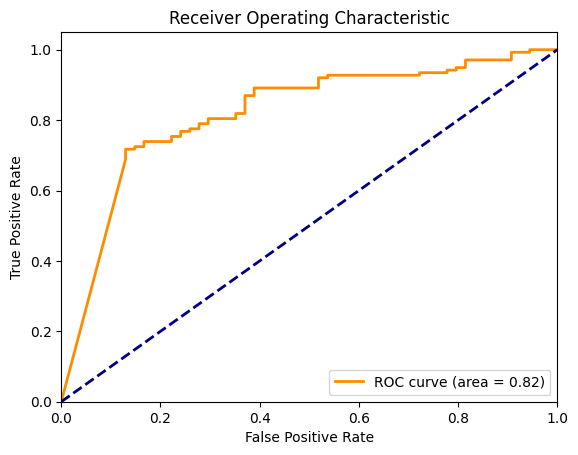

In [70]:
binary_roc_curve(classifier, X_test, y_test)

# 2. Multi-Class Classification using SVM and Random Forest

- In this section we will build a multi class classification model.
- Originally the `spectrum_baseline` data contains class 0, 2, 3, 4 i.e., total 4 class. Here for sake of model simplicity we will restrict ourselves to 3 class. Therefore, to make this 4 class data to 3 class data we will remove class 4 futher in this section.
- So, after removing the 4th class, we have labels as 0, 2, 3. It's better to change the labels from 0, 2, 3 to 0, 1 2 where 2 is changed to 1 (`2->1`) and 3 is changed to 2 (`3->2`)

### Preprocessing

In [71]:
multiclass_label_extra_label = pd.DataFrame()

In [72]:
#GRADED ASSIGNMENT
#Point = 2
#function to transform original label data to multi class classification label
def organize_multiclass_labels(old_labels, new_labels):
    """This function transforms the original data to multiclass classification data having labels 0, 1 and 2 only.
       currently we have 0,2,3 and 4 class, we will change this to 0,1,2 and 4. the reason we're on changing 4 is
       because we will drop this class afterwards as we're only classifying 3 classes for simplicity of the model.

    old_labels: old label or original label that was given to you
    new_labels: new label that is to be converted. in begining it's an empty data frame. It is "multiclass_label_extra_label"
                dataframe created in the above cell. extra_label is added to the name becuse there is class 4
                present which we will remove furthur in this section

    Returns: new_labels (Updated dataframe with class 0, 1, 2, and 4)

    Hint: use replace method of dataframe. do this for 2 and 3 class only. Leave class 4 as it is"""

    # YOUR CODE HERE
    new_labels = old_labels.copy() # Create a copy of old_labels to avoid modifying the original
    new_labels['labels'] = new_labels['labels'].replace({2: 1, 3: 2})
    return new_labels


In [73]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [74]:
multiclass_label_extra_label = organize_multiclass_labels(labels, multiclass_label_extra_label)

In [75]:
samples_per_class(labels.labels)

,count
labels,
0,306
2,263
4,196
3,195


In [76]:
samples_per_class(multiclass_label_extra_label.labels)

,count
labels,
0,306
1,263
4,196
2,195


In [77]:
data_spectrum.shape

(960, 1014)

In [78]:
multiclass_label_extra_label.labels.shape

(960,)

In [79]:
multiclass_data_extra_label_data = merge_and_shuffle(data_spectrum, multiclass_label_extra_label)

In [80]:
samples_per_class(multiclass_data_extra_label_data.labels)

,count
labels,
0,306
1,263
4,196
2,195


In [81]:
#GRADED ASSIGNMENT
#Point = 2
#function to remove 4th redundant class which we will not use
def remove_4th_class(multiclass_data_extra_label_data):
    """This function removes 4th redundant class which we will not use hence dropping
    multiclass_data_extra_label_data: new transformed multiclass classification data with class 4

    Returns: multiclass_data without class 4

    Hint: use where method of dataframe, dropna, drop etc"""
    filtered_data = multiclass_data_extra_label_data[multiclass_data_extra_label_data['labels'] != 4]

    # Reset index after removing rows
    filtered_data = filtered_data.reset_index(drop=True)

    return filtered_data


In [82]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [83]:
multiclass_data = remove_4th_class(multiclass_data_extra_label_data)

In [84]:
samples_per_class(multiclass_data.labels)

,count
labels,
0,306
1,263
2,195


In [85]:
#GRADED ASSIGNMENT
#Point = 2
#function to separate the features and labels from the dataframe
def get_features_and_labels(data):
    """This function separates the features and labels from the dataframe
    data: dataframe containing feaures as well as labels in column name "labels"

    Returns: features, labels

    Hint: use drop method of dataframe"""

    # YOUR CODE HERE
    labels = data['labels']

    # Extract features by dropping the label column
    features = data.drop('labels', axis=1)
    return features, labels

In [86]:
X, y = get_features_and_labels(multiclass_data)

### Standarize the data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
X = standarize_features(X)

### Split the data into training and testing phase

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = split_data(X, y)

## 2.1 SVM

### Building the model

In [91]:
from sklearn.svm import SVC

check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) see how to implement the SVM classifier

In [92]:
#GRADED ASSIGNMENT
#Point = 4
#function to fit the svm classifier to the training data
def fit_svm_classifier(X_train, y_train):
    """This function fits the svm classifier to the training data
    X_train, y_train: array of features and labels training data

    Returns: classifier class

    Hint: first define the class then use fit method and finally return the classifier

    Note: Please set "probability" argument of SVC class to "True" and for rest of argument use the default arguments only for
          SVC. Once submitted this assignment for grading you're encouraged to play around with the arguments. Look for
          documentation link given in above cell and understand what each argument are and how it affects the classifier.
          BUT USE DEFAULT ARGUMENTS(meaning you don't have to put any arguments when defining the SVC class) ONLY
          FOR SUBMISSION OF THIS ASSIGNMENT. Once submitted play around with arguments"""

    imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
    X_train_imputed = imputer.fit_transform(X_train)

    # Define the SVM classifier
    svm_classifier = SVC(probability=True) # Use a different variable name to avoid conflicts

    # Fit the classifier to the imputed training data
    svm_classifier.fit(X_train_imputed, y_train)

    return svm_classifier
    raise NotImplementedError()

In [93]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [94]:
classifier = fit_svm_classifier(X_train, y_train)

### Prediction and Model Evaluation

In [95]:
training_score, testing_score, y_pred = score_and_predict(classifier, X_train, y_train, X_test, y_test)

In [96]:
print('Mean accuracy on training data = {} and testing data = {}'.format(training_score.round(2), testing_score.round(2)))

Mean accuracy on training data = 0.89 and testing data = 0.76


In [97]:
print_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.76      0.67      0.71        63
           2       0.68      0.72      0.70        32

    accuracy                           0.76       153
   macro avg       0.75      0.76      0.75       153
weighted avg       0.76      0.76      0.76       153



In [98]:
from sklearn.preprocessing import label_binarize

Below is the AUC-ROC Curve that you've to plot for multiclass classification. Your plot should look similar to the plot shown below.
<img src="https://github.com/tannisthamaiti/Liver_cancer_classification/blob/master/img/multiclass_roc.png?raw=true" height=200px>

In [104]:
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc
#MANUALLY GRADED ASSIGNMENT
#Point = 4
#function to plot AUC-ROC Curve for multiclass classification
from itertools import cycle
def multiclass_roc_curve(classifier, X_test, y_test):
    """This function plots AUC-ROC Curve for multiclass classification and shows AUC as legend of the plot
    classifier: trained classifier
    X_test, y_test: test data and it's corresponding labels

    Returns: Nothing, just plot

    Hint: 1. Binarize(one-hot-encoded) the "y_test" using sklearn's label_binarize
          2. use classifier's predict_prob method to predict the probaility
          3. use sklearn's metrics.roc_curve in loop to loop over 3 classes for plotting purpose in the same figure

          Input to roc_curve is true labels and probability estimates of the POSITIVE CLASS ONLY
          for more info on sklearn's roc_curve look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html"""





    # Binarize the output labels (one-hot encoding)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_bin.shape[1]

    # Compute the probability predictions
    y_score = classifier.predict_proba(X_test_imputed)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multiclass Classification')
    plt.legend(loc="lower right")
    plt.show()


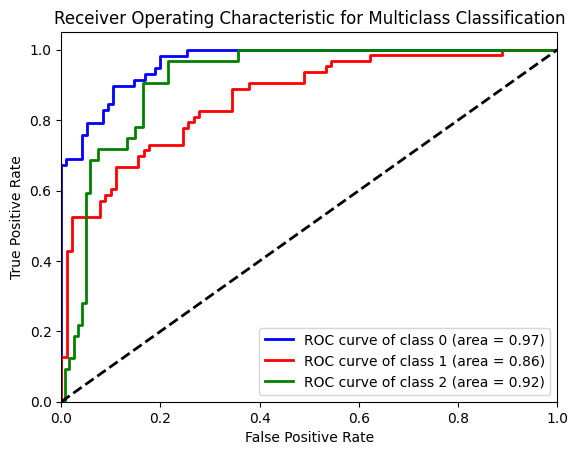

In [105]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
multiclass_roc_curve(classifier, X_test_imputed, y_test)

## 2.2 Random Forest

### Building the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) see how to implement the SVM classifier

In [ ]:
#GRADED ASSIGNMENT
#Point = 4
#function to fit the random forest classifier to the training data
def fit_random_forest_classifier(X_train, y_train):
    """This function fits the random forest classifier to the training data
    X_train, y_train: array of features and labels training data

    Returns: classifier class

    Hint: first define the class then use fit method and finally return the classifier

    Note: Please use the default arguments only for RandomForestClassifier. Once submitted this assignment for grading you're
          encouraged to play around with the arguments. Look for documentation link given in above cell and understand what each
          argument are and how it affects the classifier. BUT USE DEFAULT ARGUMENTS(meaning you don't have to put any arguments
          when defining the RandomForestClassifier class) ONLY FOR SUBMISSION OF THIS ASSIGNMENT. Once submitted play around
          with arguments"""

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

In [ ]:
classifier = fit_random_forest_classifier(X_train, y_train)

### Prediction and Model Evaluation

In [ ]:
training_score, testing_score, y_pred = score_and_predict(classifier, X_train, y_train, X_test, y_test)

In [ ]:
print('Mean accuracy on training data = {} and testing data = {}'.format(training_score.round(2), testing_score.round(2)))

In [ ]:
print_classification_report(y_test, y_pred)

In [ ]:
multiclass_roc_curve(classifier, X_test, y_test)

# 3. PCA Reduction and Random Forest Classification on Reduced data

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#GRADED ASSIGNMENT
#Point = 4
#function to apply pca on data for dimentionality reduction
def fit_pca(features, n_components):
    """This function fits pca for dimentionality reduction
    features: array of features that is to be reduced in another dimention
    n_components = int, Number of components to keep, i.e., final dimention of the data

    Returns: reduced_features and pca class

    Hint: first define the class then use fit method then transform method and finally return the reduced
          feature along with pca class

    Note: Please use the default arguments only for PCA except n_components. Once submitted this assignment for grading you're
          encouraged to play around with the arguments. Look for documentation link given in above cell and understand what each
          argument are and how it affects the dimentionality reduction. BUT USE DEFAULT ARGUMENTS EXCEPT n_component(meaning
          you don't have to put any arguments only have to proide argument of n_component in PCA class) ONLY FOR SUBMISSION OF
          THIS ASSIGNMENT. Once submitted play around with arguments"""

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
#YOU MUST NOT DELETE/EDIT THIS CELL.
#TEST CELL

As the number of Principal Components (PCs) is equal to the number of original variables, we should keep only the PCs which explain the most variance (70-95%) to make the interpretation easier. More the PCs you include that explains most variation in the original data, better will be the PCA model. This is highly subjective and based on the user interpretation.

Here in this notebook we choose to reduce our data to 50 components only.

In [ ]:
X_train_reduced_train, pca = fit_pca(X_train, 50)
X_train_reduced_test = pca.transform(X_test)

In [ ]:
plt.bar(list(range(1,51)), pca.explained_variance_ratio_*100)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance (%)')
plt.show()

- We should keep only the PCA Components which explain the most variance, to make the interpretation easier. More the PCA Components you include that explains most variation in the original data, better will be the PCA model. Check out this [post](https://reneshbedre.github.io/blog/pca_3d.html) for better understating of PCA.

- As you can see that upto PCA component 32 there is some visible variance but after $32^{nd}$ PCA component there's hardly any contribution. Hence we will go back and this time reduce our data to 32 components only and use it to train a Random Forest Classifier

In [ ]:
X_train_reduced_train, pca = fit_pca(X_train, 32)
X_train_reduced_test = pca.transform(X_test)

In [ ]:
pca_classifier = fit_random_forest_classifier(X_train_reduced_train, y_train)
training_score, testing_score, y_pred = score_and_predict(pca_classifier, X_train_reduced_train, y_train,
                                                          X_train_reduced_test, y_test)

In [ ]:
print('Mean accuracy on training data = {} and testing data = {}'.format(training_score.round(2), testing_score.round(2)))

While simple Random Forest Classifier had accuracy of 84%, Random Forest Classifier on PCA reduced data to 32 components is having better accuracy i.e., 88%.

In [ ]:
print_classification_report(y_test, y_pred)

In [ ]:
multiclass_roc_curve(pca_classifier, X_train_reduced_test, y_test)

# Congratulations !

Congratulation on completing this assignment. You now understand how to build machine learning classifier using scikit learn library. You have implemented all the building blocks of a machine learning project. Please submit this assignment. After submission you're encourange to play around with different arguments and see the changes it brings.

# Happy Machine Learning :)